In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

In [42]:
data_sales = pd.read_csv('data/Sales.csv')
data_customers = pd.read_csv('data/Customers.csv', encoding='latin1')
data_stores = pd.read_csv('data/Stores.csv')
data_products = pd.read_csv('data/Products.csv')

In [43]:
data_sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [44]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [45]:
data_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [46]:
data_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [47]:
data_products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [48]:
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [49]:
data_stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [50]:
data_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


## RESUMEN

Contamos con 4 (cuatros) tablas con datos que utilizaremos para nuestro analisis.

***Tabla de ventas:*** La tabla cuenta con los registro de ventas de la tienda.  
- Cuenta con valores nulos: si, un total de 49.719.

***Tabla de Productos:*** La tabla cuenta con los productos vendidos en la tienda. No registra valores nulos.

***Tabla de Clientes:*** La tabla cuenta con los registros de los clientes. No registra valores nulos.

***Tabla de Tiendas:*** La tabla cuenta con los registros de las tiendas. No registra valores nulos.


# Analisis univariado de la tabla de ventas

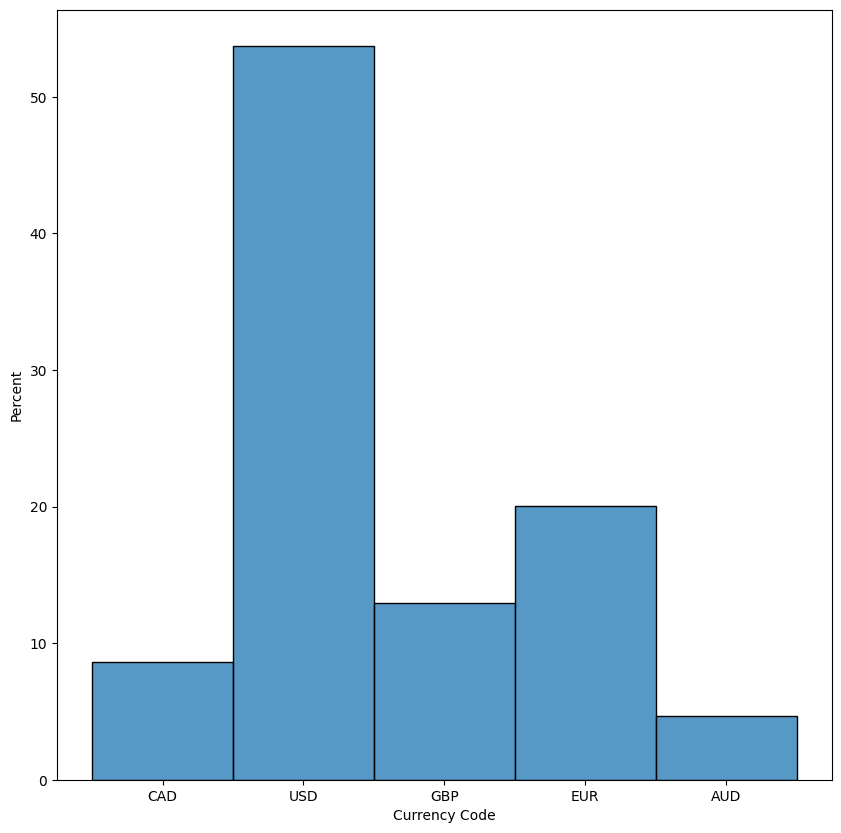

In [51]:
plt.figure(figsize=(10,10))
sns.histplot(data=data_sales, x="Currency Code", stat="percent")
plt.show()

Podemos observar en el histograma, que la gran mayoria de las compras se hicieron en Dolares(usd) mas del 50%, luego le sigue el Euro(EUR) 20%, luego los siguientes 30% se distribuyen entre AUD, CAD y GBP.

In [52]:
data_sales.groupby(["CustomerKey", "Currency Code"])["Quantity"].sum().sort_values(ascending=False).reset_index()

,CustomerKey,Currency Code,Quantity
0,723572,EUR,124
1,1925694,USD,123
2,461982,EUR,107
3,1736139,USD,103
4,1579183,USD,100
...,...,...,...
11882,411322,EUR,1
11883,1354143,USD,1
11884,413393,EUR,1
11885,1012662,GBP,1


In [53]:
# La media de los registros agrupados por la moneda
data_sales.groupby("Currency Code")["Quantity"].mean()

Currency Code
AUD    3.131248
CAD    3.101200
EUR    3.173283
GBP    3.107862
USD    3.151213
Name: Quantity, dtype: float64

In [54]:
data_sales.groupby("Currency Code")["Quantity"].sum()

Currency Code
AUD      9209
CAD     16793
EUR     40050
GBP     25298
USD    106407
Name: Quantity, dtype: int64

> **Nota:** Podemos ver que la media de las compras por moneda es de 3 (Tres), sin olvidar que la gran mayoria de registros se encuentran en la moneda USD, aun se encuentran lagunas en nuestros datos pq las tablas no estan unidas en una sola.

Procederemos a agrupar los registros en una sola tabla, y añadiremos los datos que nos hacen falta para nuestro analisis.

In [55]:
# Nota, antes de realizar lo mencionado, vamos a eliminar columnas que no tengan relevancia para nuestro analisis.
# Quiero realizar algunas modificaciones a la tabla de ventas.
ventas = data_sales.copy()
ventas.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [56]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [57]:
ventas["Order Date"] = pd.to_datetime(ventas["Order Date"], dayfirst=False, yearfirst=False)
ventas["Delivery Date"] = pd.to_datetime(ventas["Delivery Date"], dayfirst=False, yearfirst=False)

In [58]:
print(ventas["StoreKey"].sort_values().unique())
print(f"Cantidad de tiendas en Total: {len(ventas["StoreKey"].sort_values().unique())}")

[ 0  1  2  4  5  6  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 26 27
 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 47 48 49 50 51 53 54
 55 56 57 59 61 62 63 64 65 66]
Cantidad de tiendas en Total: 58


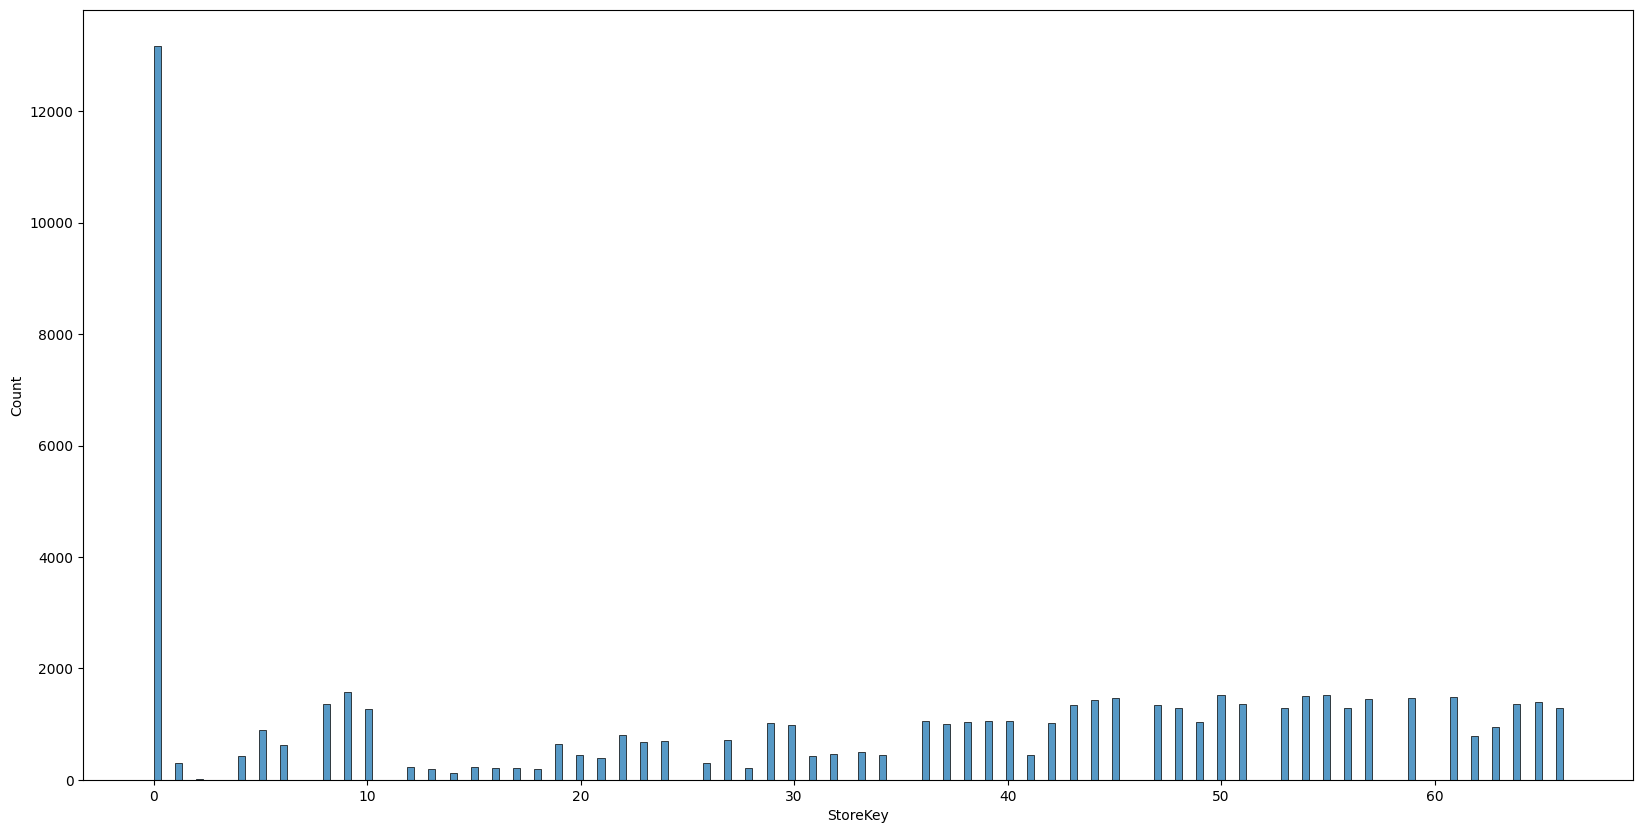

In [59]:
# Que le falta a mi tabla de ventas?, Si, le falta los locales. Para ello tenemos los KEYs de las Tiendas
plt.figure(figsize=(20,10))
sns.histplot(data=ventas, x="StoreKey", bins=200)
plt.show()

En el grafico puede apreciar de buena manera la destribucion de las compras en las diversas tiendas. En la tienda en la cual se concentra la mayor cantidad de compras es en la tienda con key nro "0".

In [60]:
ventas_Tienda0 = ventas.query("StoreKey == 0")
ventas_tiendas_demas= ventas.query("StoreKey != 0")

In [61]:
ventas_Tienda0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13165 entries, 1 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   13165 non-null  int64         
 1   Line Item      13165 non-null  int64         
 2   Order Date     13165 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    13165 non-null  int64         
 5   StoreKey       13165 non-null  int64         
 6   ProductKey     13165 non-null  int64         
 7   Quantity       13165 non-null  int64         
 8   Currency Code  13165 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 1.0+ MB


In [62]:
ventas_Tienda0.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
5,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD


In [63]:
ventas_tiendas_demas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49719 entries, 0 to 62879
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   49719 non-null  int64         
 1   Line Item      49719 non-null  int64         
 2   Order Date     49719 non-null  datetime64[ns]
 3   Delivery Date  0 non-null      datetime64[ns]
 4   CustomerKey    49719 non-null  int64         
 5   StoreKey       49719 non-null  int64         
 6   ProductKey     49719 non-null  int64         
 7   Quantity       49719 non-null  int64         
 8   Currency Code  49719 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 3.8+ MB


In [64]:
ventas_tiendas_demas.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
6,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP
7,366004,2,2016-01-01,NaT,1107461,38,1529,2,GBP
8,366005,1,2016-01-01,NaT,844003,33,421,4,EUR
9,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD


## Resumen:

Al separar como vi en el grafico anterior que la mayor cantidad de ventas esta concentrada en la tienda con "Key = 0", decidi separlos en dos grupos. Lo que pude notar es que la tienda con "Key = 0", ofrece a sus usuarios Delivery y las demas no.

Veremos como se comporta nuestros  graficos con este descubrimiento.

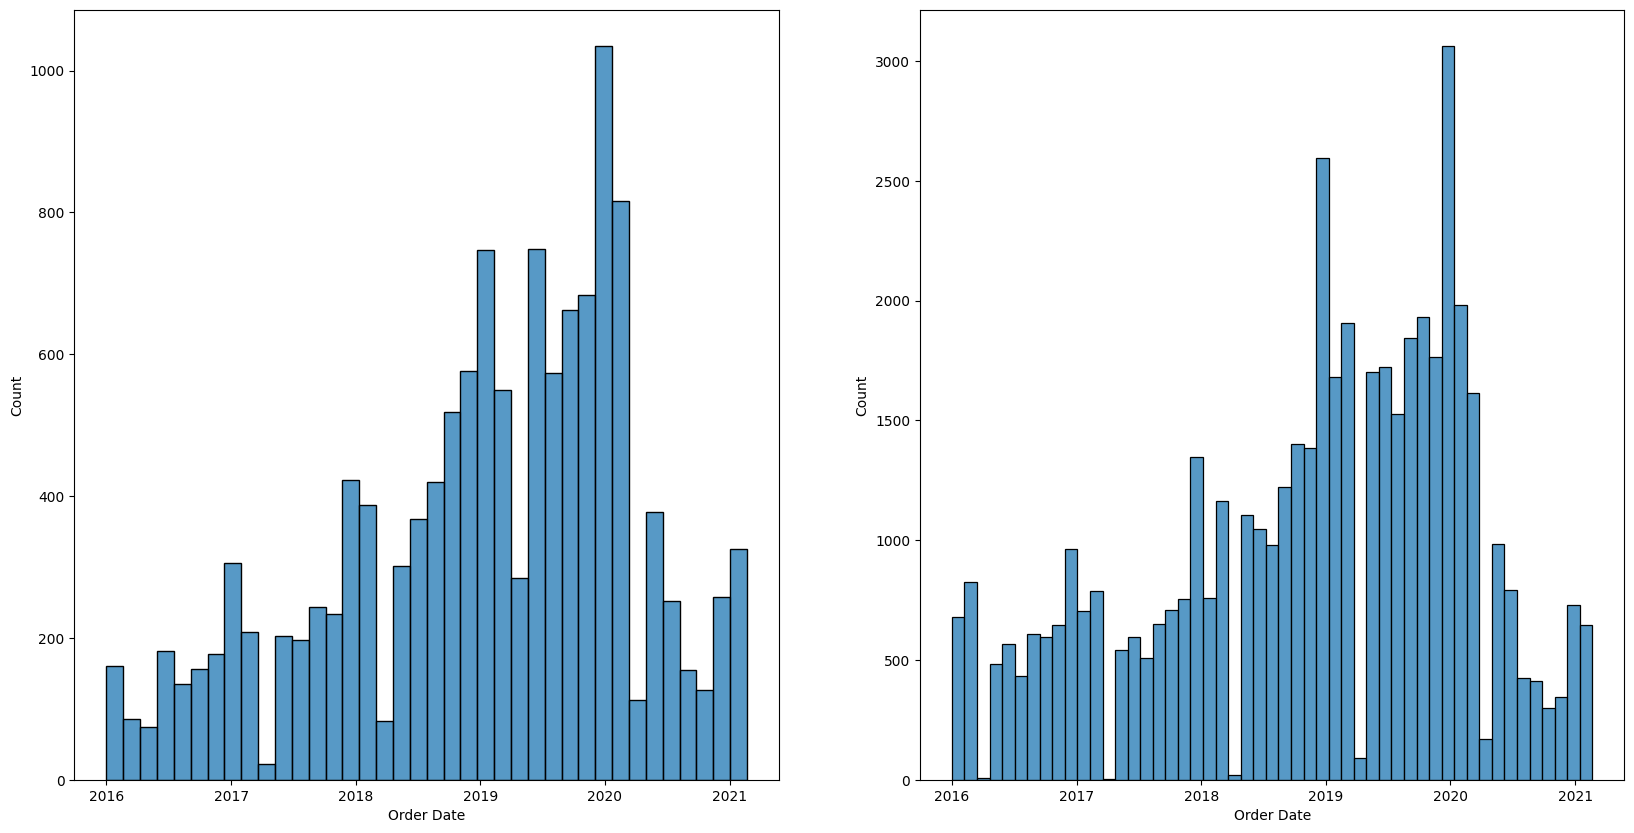

In [65]:
# Histograma
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=ventas_Tienda0, x="Order Date")
plt.subplot(1,2,2)
sns.histplot(data=ventas_tiendas_demas, x="Order Date")
plt.show()

Nuestras visualizaciones muestran una mejor apreciacion, comparado con las visualizaciones previas. Aqui nuestro histograma nos muestra el comportamiento de los registros a lo largo del tiempo. 

Lo cual es muy cierto concluir que la **Tienda Online** es la mas grande comparada a las demas.

Tambien si observamos bien, se puede ver que hubo un periodo de tiempo en el cual las ventas se dispararon. casualmente coincide con la fecha en la cual empezo la **"Pandemia"**


In [66]:
ventas_Tienda0_products = ventas_Tienda0.merge(data_products, on="ProductKey", how="left")

In [67]:
ventas_Tienda0_products.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,Silver,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,$220.64,$665.94,803,Microwaves,8,Home Appliances
2,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,Orange,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders
3,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,$166.20,$326.00,301,Laptops,3,Computers
4,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD,Contoso SLR Camera X143 Silver,Contoso,Silver,$214.03,$646.00,402,Digital SLR Cameras,4,Cameras and camcorders


In [68]:
ventas_Tienda0_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165 entries, 0 to 13164
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    13165 non-null  int64         
 1   Line Item       13165 non-null  int64         
 2   Order Date      13165 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     13165 non-null  int64         
 5   StoreKey        13165 non-null  int64         
 6   ProductKey      13165 non-null  int64         
 7   Quantity        13165 non-null  int64         
 8   Currency Code   13165 non-null  object        
 9   Product Name    13165 non-null  object        
 10  Brand           13165 non-null  object        
 11  Color           13165 non-null  object        
 12  Unit Cost USD   13165 non-null  object        
 13  Unit Price USD  13165 non-null  object        
 14  SubcategoryKey  13165 non-null  int64         
 15  Su

In [69]:
# añadiremos una columna en del genero de los clientes.
data_customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [70]:
# Las columnas que me interesan de la tabla Customers son: El genero, el pais, la cuidad.
customers = data_customers[["CustomerKey", "Gender", "City", "State", "Country"]]

In [71]:
customers.head()

,CustomerKey,Gender,City,State,Country
0,301,Female,WANDEARAH EAST,South Australia,Australia
1,325,Female,MOUNT BUDD,Western Australia,Australia
2,554,Female,WINJALLOK,Victoria,Australia
3,786,Male,MIDDLE RIVER,South Australia,Australia
4,1042,Male,TAWONGA SOUTH,Victoria,Australia


In [72]:
ventas_Tienda0_products = ventas_Tienda0_products.merge(customers, on="CustomerKey", how="left")

In [73]:
ventas_Tienda0_products.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Product Name,...,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Gender,City,State,Country
0,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,A. Datum SLR Camera X136 Silver,...,$141.47,$427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Male,Auberry,California,United States
1,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,...,$220.64,$665.94,803,Microwaves,8,Home Appliances,Male,Auberry,California,United States
2,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Contoso SLR Camera M146 Orange,...,$148.08,$322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Red Deer,Alberta,Canada
3,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Adventure Works Laptop8.9 E0890 White,...,$166.20,$326.00,301,Laptops,3,Computers,Female,Red Deer,Alberta,Canada
4,366002,3,2016-01-01,2016-01-12,266019,0,1080,4,CAD,Contoso SLR Camera X143 Silver,...,$214.03,$646.00,402,Digital SLR Cameras,4,Cameras and camcorders,Female,Red Deer,Alberta,Canada


In [74]:
ventas_Tienda0_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13165 entries, 0 to 13164
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    13165 non-null  int64         
 1   Line Item       13165 non-null  int64         
 2   Order Date      13165 non-null  datetime64[ns]
 3   Delivery Date   13165 non-null  datetime64[ns]
 4   CustomerKey     13165 non-null  int64         
 5   StoreKey        13165 non-null  int64         
 6   ProductKey      13165 non-null  int64         
 7   Quantity        13165 non-null  int64         
 8   Currency Code   13165 non-null  object        
 9   Product Name    13165 non-null  object        
 10  Brand           13165 non-null  object        
 11  Color           13165 non-null  object        
 12  Unit Cost USD   13165 non-null  object        
 13  Unit Price USD  13165 non-null  object        
 14  SubcategoryKey  13165 non-null  int64         
 15  Su

Index(['Order Number', 'Line Item', 'CustomerKey', 'StoreKey', 'ProductKey',
       'Quantity', 'SubcategoryKey', 'CategoryKey'],
      dtype='object')


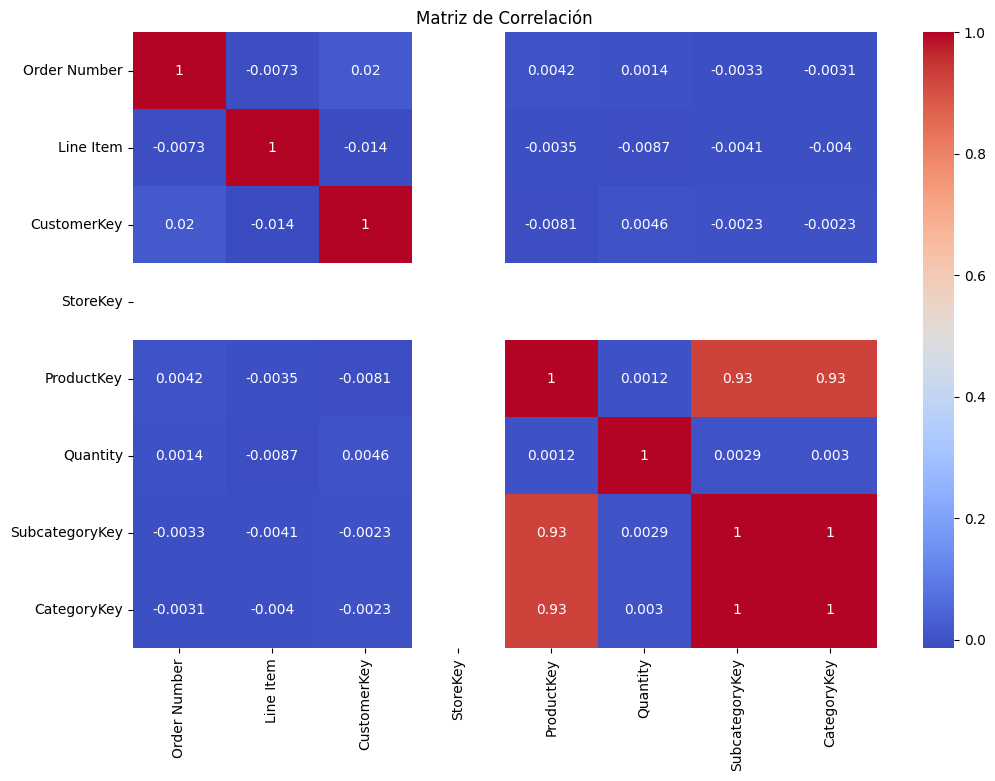

In [75]:
# Haremos un mapa de correlacion. Con el fin de ver la correlacion entre variables
# Filtrar solo columnas numéricas
numeric_data = ventas_Tienda0_products.select_dtypes(include=['float64', 'int64'])

# Comprobar las columnas numéricas seleccionadas
print(numeric_data.columns)

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()

## Resumen de la Matriz de correlacion

En la misma no se logra encontrar correlacion entre las variables numericas, ya que la mayoria de ellas no guardan relacion entre si.

Nuestro objetivos sera tratar de predecir cuales sera la mejor manera de incrementar las ventas de la tienda online, sugiriendo productos a nuestros clientes. 

In [78]:
# Identificar columnas categóricas y numéricas
categorical_features = ventas_Tienda0_products.select_dtypes(include=["object"]).columns
numerical_features = ventas_Tienda0_products.select_dtypes(include=["int64", "float64"]).columns

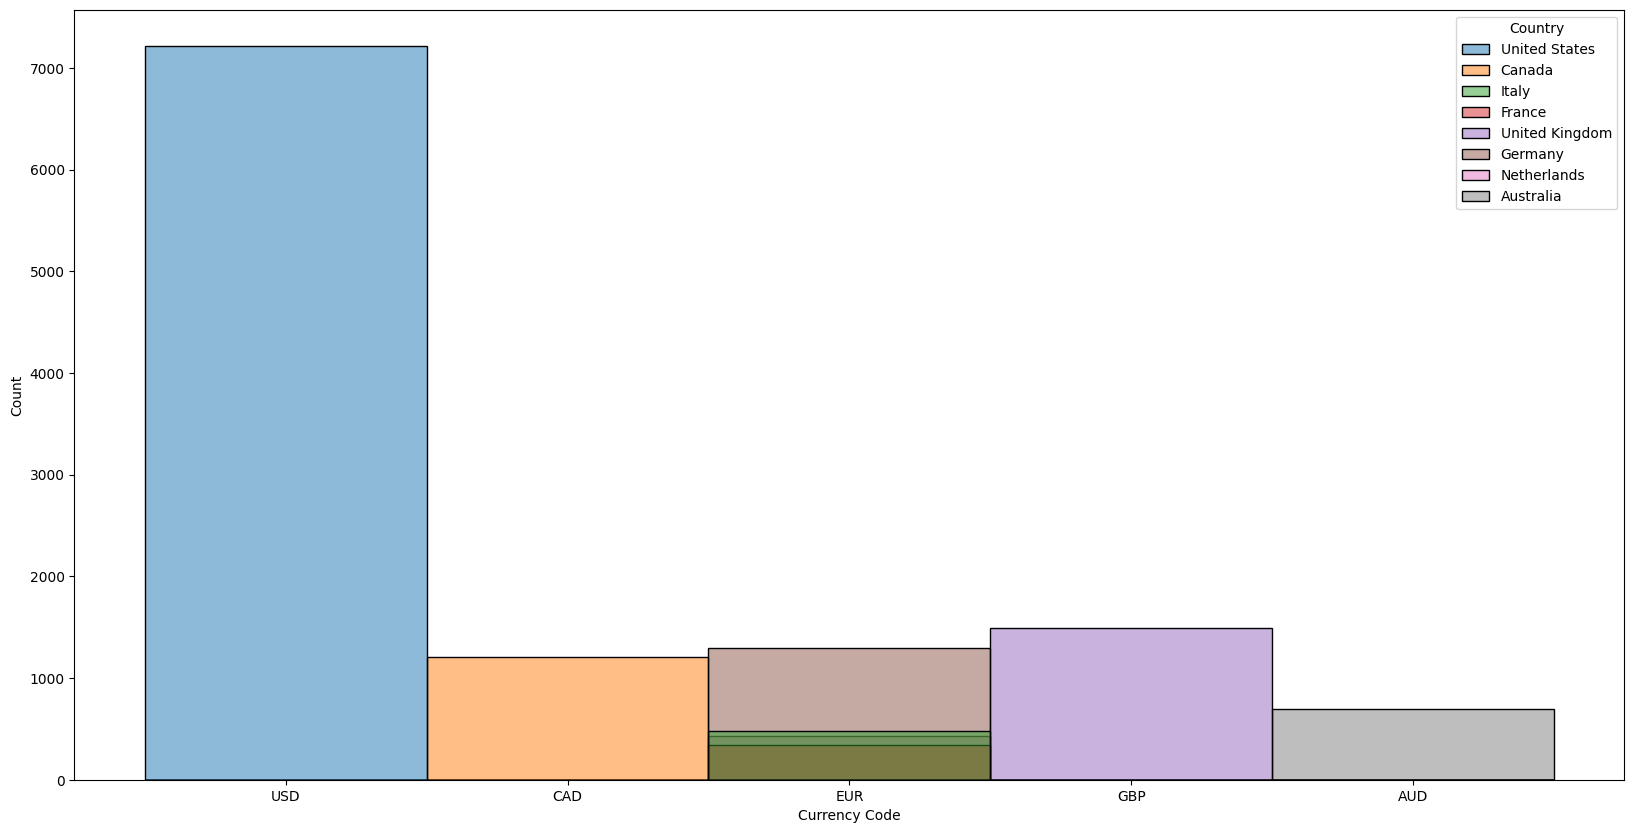

In [83]:
plt.figure(figsize=(20,10))
sns.histplot(data=ventas_Tienda0_products, hue="Country",x="Currency Code")
plt.show()

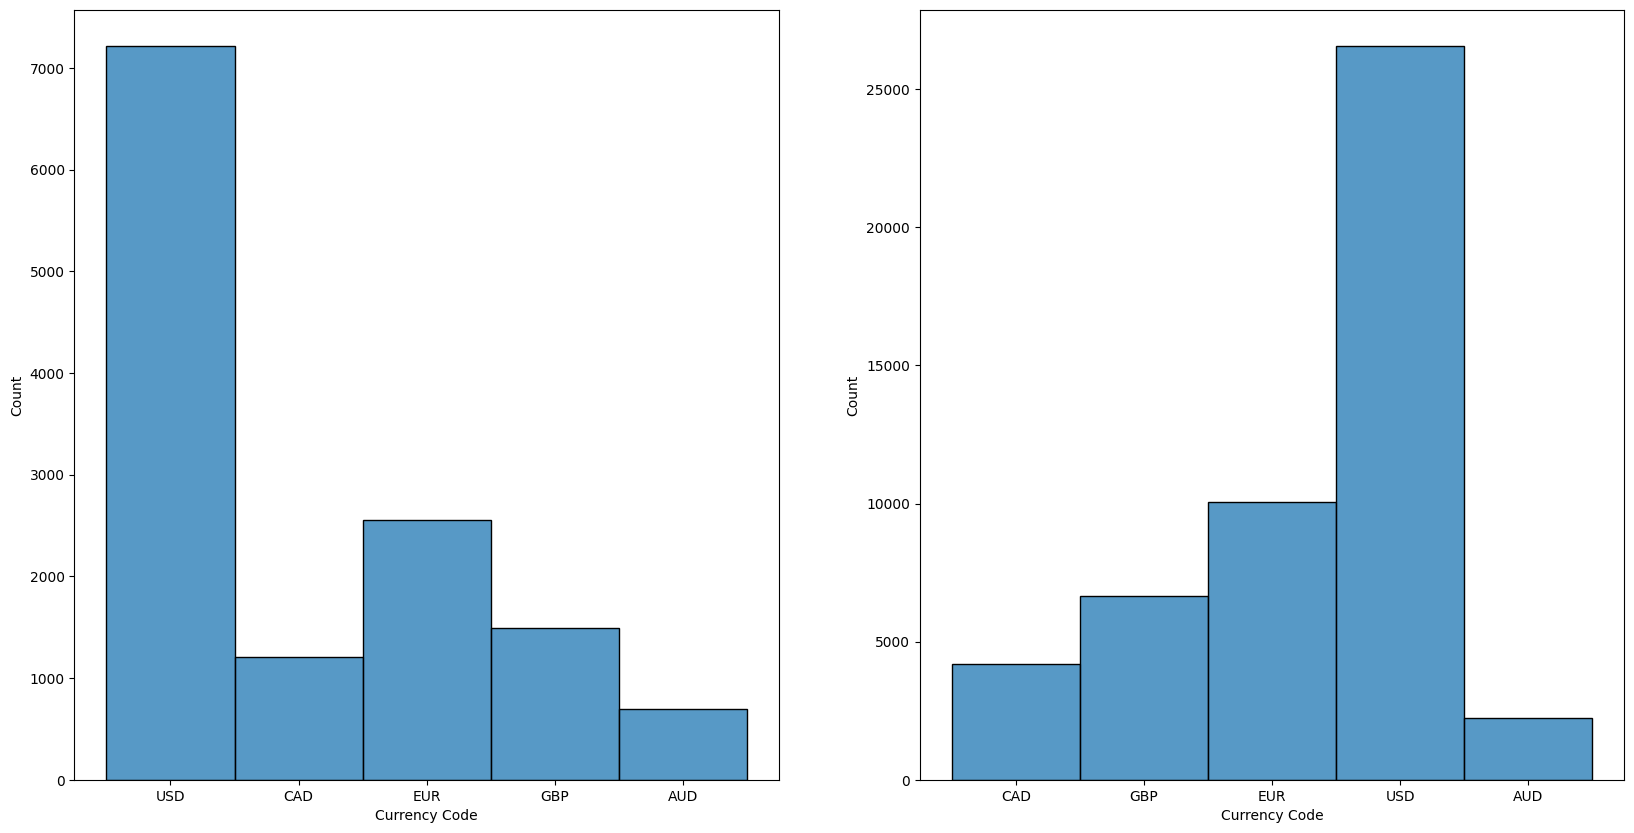

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.histplot(data=ventas_Tienda0_products, x="Currency Code")
plt.subplot(1,2,2)
sns.histplot(data=ventas_tiendas_demas, x="Currency Code")
plt.show()